# Project Name - CUSTOMER CHURN PREDICTION

# Project Summary -

**What is Customer Churn?**

Customer churn is the percentage of customers that stopped using company's product or service during a certain time frame. Customer churn is one of the most important metrics for a growing business to evaluate as it is much less expensive to retain existing customers than it is to acquire new customers. Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Customer churn is extremley costly for companies. Based on a churn rate just under two percent for top companies, one source estimates carriers lose $65 million per month from churn. To reduce customer churn, telecom companies should predict which customers are highly prone to churn.

Individualized customer retention is demanding because most companies have a large number of customers and cannot afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could concentrate customer retention efforts only on these "high risk" clients.

The goal is to understand and take steps to change it before the customer gives up the product or service.

# Problem Statement

A subscription-based service is experiencing customer
churn, impacting revenue. The goal is to develop a predictive model that can
identify customers at risk of churning, allowing for targeted retention efforts.

# Business Objective

1.Analyze customer data to understand churn patterns.

2.Develop a machine learning model for churn prediction.

3.Provide actionable insights for customer retention.

# About Data

1.customerID : Customer ID

2.gender : Whether the customer is a male or a female

3.SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

4.Partner : Whether the customer has a partner or not (Yes, No)

5.Dependents : Whether the customer has dependents or not (Yes, No)

6.tenure : Number of months the customer has stayed with the company

7.PhoneService : Whether the customer has a phone service or not (Yes, No)

8.MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

9.InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

10.OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

11.OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

12.DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

13.TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

14.StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

15.StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

16.Contract : The contract term of the customer (Month-to-month, One year, Two year)

17.PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

18.PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

19.MonthlyCharges : The amount charged to the customer monthly

20.TotalCharges : The total amount charged to the customer

21.Churn : Whether the customer churned or not (Yes or No)

**Dataset Link** - https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1dFkT-RNfbogbL76rx3O-LgMte2XcuKpg%2Fview%3Fusp%3Dsharing


# 1. Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://drive.google.com/file/d/1dFkT-RNfbogbL76rx3O-LgMte2XcuKpg/view?usp=sharing'
file_id=url.split('/')[-2]
link='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(link)
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Dataset Rows & Columns count
print (data.index)
print('\n \n')
print(data.columns)

RangeIndex(start=0, stop=7043, step=1)

 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Handling Missing Values

Let's find if we have missing values in dataset.

In [6]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data[data['TotalCharges'].isnull()].index.tolist()


[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [9]:
ind = data[data['TotalCharges'].isnull()].index.tolist()
for i in ind:
  if data['Contract'].iloc[i,] == 'Two year':
    data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,] * 24
  elif data['Contract'].iloc[i,] == 'One year':
    data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,] * 12
  else:
    data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,]

C:\Users\Pc\AppData\Local\Temp\ipykernel_6596\1168886884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,] * 24
C:\Users\Pc\AppData\Local\Temp\ipykernel_6596\1168886884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,] * 24
C:\Users\Pc\AppData\Local\Temp\ipykernel_6596\1168886884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [10]:
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Let's find if we have duplicate rows.**

In [11]:
data.duplicated().sum()


0

In [12]:
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
data.describe(include=object).T


,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**That's a lot of columns, to simplify our experiment we will only use 2 features tenure and MonthlyCharges and the target would be Churn of course. Let us do EDA and visualization on our features and target.**

# 3. EDA - Independent Variables

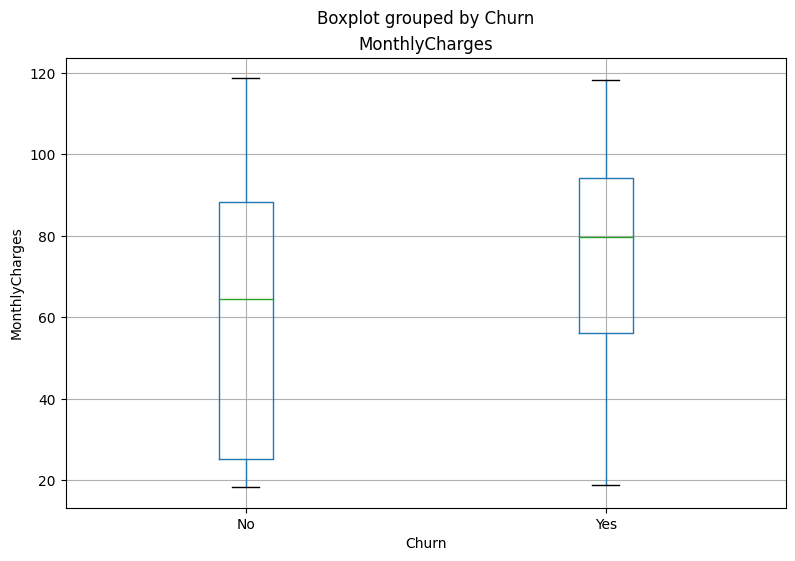

In [14]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
data.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

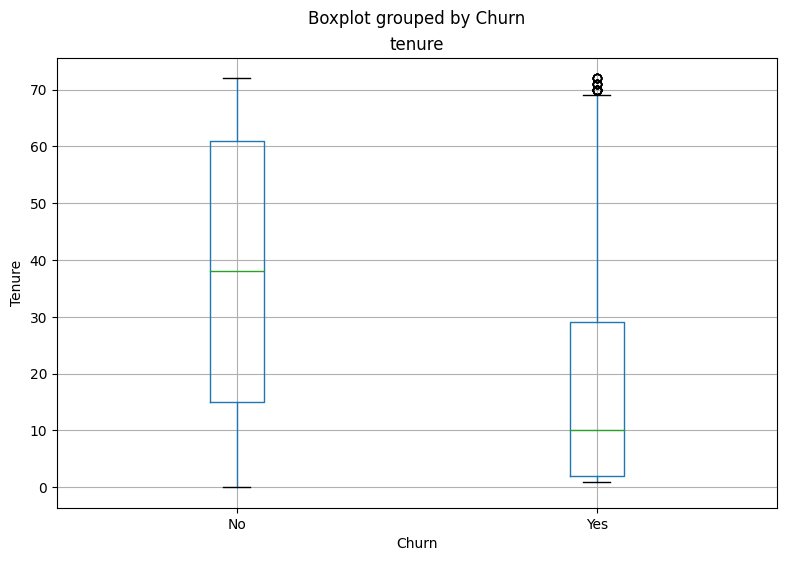

In [15]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
data.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

***Insights of our EDA***


1.   We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
2.   There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.



Before we start predicting, an important step to do is to convert our Churn feature, which is a string, into integer. Yes will be converted to 1 and No will be converted to 0. We will name this new columns a "class".

In [16]:
data['class'] = data['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

# features will be saved as X and our target will be saved as y
X = data[['tenure','MonthlyCharges']].copy()
y = data['class'].copy()

In [17]:
data.shape

(7043, 22)

# 4. Dataset Splitting

let's separate the data into training and testing set.



In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [19]:
y_train.value_counts()

class
0    4133
1    1501
Name: count, dtype: int64

In [20]:
y_test.value_counts()

class
0    1041
1     368
Name: count, dtype: int64

# 5. Fitting logistic regression on train data

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Get the model coefficients and intercept

print(clf.coef_)
print(clf.intercept_)

[[-0.05646728  0.03315385]]
[-1.77408975]


In [23]:
# Get the predicted probabilities

train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [24]:
# Get the predicted classes

train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

**Confusion Matrix for both train and test data.**

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

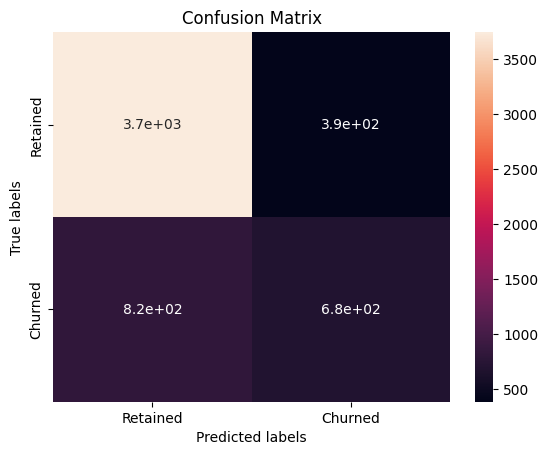

In [25]:
# Get the confusion matrix for both train and test

from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

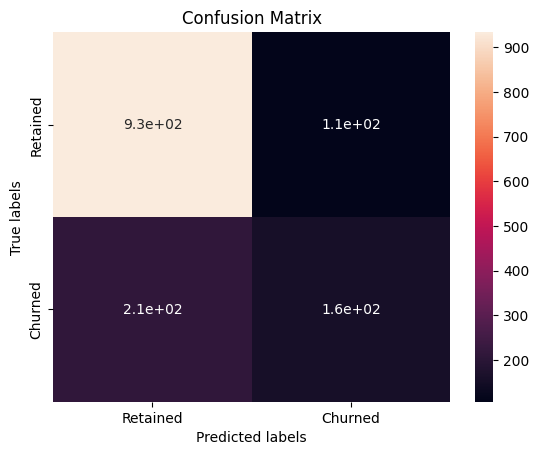

In [26]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# 6. Evaluation Metrics for Classification:

1. **Accuracy**: Measures the proportion of correctly predicted observations to the total observations. It's a useful metric when the target classes are well balanced.

Accuracy tells us what portion of our predictions were correct. It's like checking how many answers you got right on a test out of all the questions.

  ***Accuracy=Number of Correct Predictions/Total Number of Predictions***







In [27]:
from sklearn.metrics import accuracy_score

# Get the accuracy scores

test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.7735982966643009


2. **Precision**: Indicates the proportion of positive identifications that were actually correct. It's particularly useful in scenarios where the cost of a false positive is high.

Precision tells us how many of the predicted "rain" days were actually rainy. It's like if you guessed which days would be rainy, how often you'd be right.

***Precision=True Positives / True Positives+False Positives***

In [28]:
from sklearn.metrics import precision_score

# Get the precision scores

test_precision = precision_score(y_test,test_class_preds)
print("The precision on test data is ", test_precision)

The precision on test data is  0.5931558935361216


3. **Recall** **(Sensitivity)**: Measures the proportion of actual positives that were identified correctly. It's important in cases where missing a positive is costly.

Recall shows us how many of the actual rainy days we managed to predict correctly. It’s like checking how many rainy days you didn’t miss in your predictions.

***Recall=True Positives / True Positives+False Negatives***

In [29]:
from sklearn.metrics import recall_score

# Get the recall scores

test_recall = recall_score(y_test,test_class_preds)
print("The recall on test data is ", test_recall)

The recall on test data is  0.42391304347826086


4. **F1-Score**: The harmonic mean of precision and recall, it is a single metric that balances both the concerns of precision and recall in one number.

The F1-Score combines precision and recall into one number, balancing the two. It's useful when you want a single score to understand your model's accuracy.

***F1-Score=2×[Precision×Recall / Precision+Recall]***

In [30]:
from sklearn.metrics import f1_score

# Get the f1 scores

test_f1 = f1_score(y_test,test_class_preds)
print("The f1 score on test data is ", test_f1)

The f1 score on test data is  0.49445324881141045


5. **Log Loss (Logistic Loss or Cross-Entropy Loss)**: Measures the performance of a classification model where the prediction is a probability between 0 and 1. Lower log loss values indicate better performance.

Log Loss measures how close our probability predictions are to the actual outcomes. A lower log loss means better predictions. It's like being scored on how confident and correct your predictions are.

***Log Loss=−∑i=1M[yilog(Pi)+(1−yi)log(1−Pi)]***

In [31]:
from sklearn.metrics import log_loss

# Get the log_loss scores

test_log_loss = log_loss(y_test,test_preds[:,1])
print("The log_loss score on test data is ", test_log_loss)

The log_loss score on test data is  0.46867242841213097


6. **AUC-ROC**: The Area Under the Receiver Operating Characteristic Curve (ROC AUC) measures the ability of a model to distinguish between the classes. An AUC of 1 indicates a perfect model; an AUC of 0.5 suggests no discriminative power.

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels. The AUC is the area under this curve.

AUC-ROC tells us how well our model can distinguish between two classes (rain or no rain). A higher score means better distinction. Imagine it as measuring how well a doctor can distinguish between sick and healthy patients.

In [32]:
from sklearn.metrics import roc_auc_score

# Get the roc_auc_score scores

test_roc_auc_score = roc_auc_score(y_test,test_preds[:,1])
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  0.7859460489495886


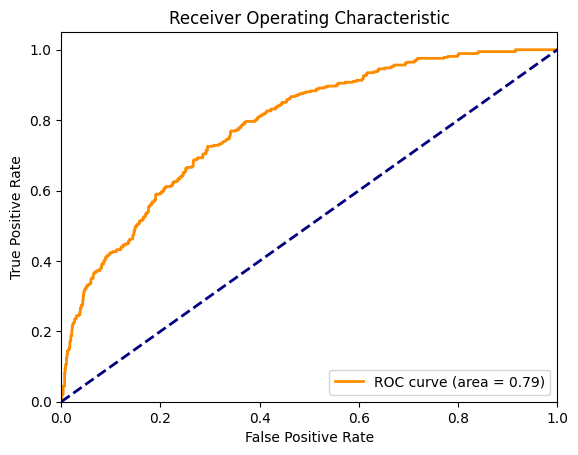

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Calculate ROC curve

fpr, tpr, thresholds = roc_curve(y_test, test_preds[:,1])

# Calculate AUC

roc_auc = auc(fpr, tpr)

# Plotting

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Each of these metrics provides a different insight into the performance of a classification model. It's often useful to consider multiple metrics when evaluating a model, as each has its strengths and weaknesses depending on the specific characteristics of the dataset and the business problem.

# 7.CONCLUSION:

We achieved about 86% accuracy on the test.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.